In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Display settings so all columns can be visible
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

# Graphic style
sns.set_style("whitegrid")

%matplotlib inline


In [2]:
# Load data from Artifacta
df = pd.read_csv('../artifacts/train.csv')

print(f"Dataset Shape: {df.shape}")
df.head(3)


Dataset Shape: (39116, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,25674366,Mid Century Modern Williamsburg Condo,9038810,Sanjay,Brooklyn,Williamsburg,40.71577,-73.95530,Entire home/apt,295,3,11,2019-05-16,0.87,1,1
1,19100971,Spacious Bedroom with lots of Natural Light,81745867,Jacqueline,Manhattan,Washington Heights,40.84917,-73.94048,Private room,70,2,2,2018-06-25,0.16,1,0
2,24209867,Spacious Room in Clinton Hill/Bed-Stuy,1218837,Diana,Brooklyn,Bedford-Stuyvesant,40.68993,-73.95947,Private room,58,2,0,NaN,NaN,2,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39107 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39098 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [5]:
# Calculating percentage of missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
percent_missing = (missing / len(df)) * 100

missing_df = pd.DataFrame({'Missing Count': missing, '% Missing': percent_missing})
missing_df.sort_values(by='% Missing', ascending=False)


,Missing Count,% Missing
last_review,8106,20.722978
reviews_per_month,8106,20.722978
host_name,18,0.046017
name,9,0.023008


Listings with $0 price: 9


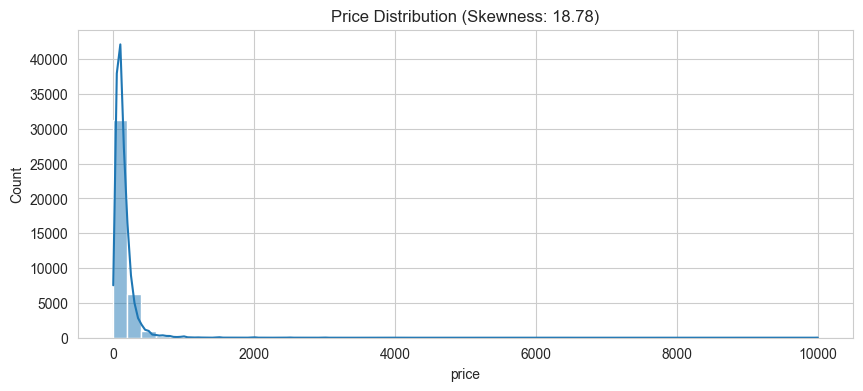

In [7]:
# Check for Free Listings (Data Error)
print(f"Listings with $0 price: {len(df[df['price'] == 0])}")

# Distribution
plt.figure(figsize=(10, 4))
sns.histplot(df['price'], kde=True, bins=50)
plt.title(f"Price Distribution (Skewness: {df['price'].skew():.2f})")
plt.show()


In [ ]:
# Check Logic: Agar reviews_per_month missing hai, to kya number_of_reviews 0 hai?
null_reviews = df[df['reviews_per_month'].isnull()]
print("Max reviews for null rows:", null_reviews['number_of_reviews'].max())


Max reviews for null rows: 0


In [9]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")


name: 38416 unique values
host_name: 10032 unique values
neighbourhood_group: 5 unique values
neighbourhood: 220 unique values
room_type: 3 unique values
last_review: 1688 unique values


In [ ]:
# Coordinates for Empire State Building
lat_center = 40.7484
lon_center = -73.9857

def haversine_distance(lat, lon):
    # Simple Euclidean distance for now (approximation)
    return np.sqrt((lat - lat_center)**2 + (lon - lon_center)**2)

# Create temporary feature to test correlation
df['distance_center'] = haversine_distance(df['latitude'], df['longitude'])

# Scatter plot: Price vs Distance
sns.scatterplot(x=df['distance_center'], y=df['price'], alpha=0.5)
plt.title("Price vs Distance from Center")
plt.ylim(0, 1000) # Zoom in
plt.show()

print("Correlation with Price:", df['price'].corr(df['distance_center']))
